Cleaning the data

In [1]:
# import the required libraries
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("austin_weather.csv")

In [4]:
# Drop the unnecessary columns in our data which do not play a role in the rainfall prediction
data = data.drop(
    ['Events', 'Date', 'SeaLevelPressureHighInches', 'SeaLevelPressureLowInches'], axis=1)

In [5]:
'''Some factors weren't recorded like the rainfall in centimeters was marked as T, and our algorithm requires numbers
so we can't work with alphabets popping in our data. Replace 'T','-' with 0.0 '''
data = data.replace('T', 0.0)
data = data.replace('-', 0.0)

In [6]:
# Save the data in a csv file
data.to_csv('austin_final.csv')

In [7]:
#Now we will read the cleaned data and train our model on the basis of this cleaned data
data = pd.read_csv("austin_final.csv")

In [8]:
# Drop the 'PrecipitationSumInches' column from the dataset to create the feature set 'X'.
X = data.drop(['PrecipitationSumInches'], axis=1)

# Extract the 'PrecipitationSumInches' column as the target variable 'Y'.
Y = data['PrecipitationSumInches']
Y = Y.values.reshape(-1, 1) # Reshape 'Y' to a 2D array with a single column using 'reshape(-1, 1)'.

day_index = 798 # Specify a specific day index
days = [i for i in range(Y.size)] #list representing the total number of days in the dataset

In [9]:
clf = LinearRegression() # Creating a Linear Regression model instance from skitlearn.
clf.fit(X, Y) # Train the model using the feature set 'X' and target variable 'Y'.

LinearRegression()

In [10]:
inp = np.array([[74], [60], [45], [67], [49], [43], [33], [45],
                [57], [29.68], [10], [7], [2], [0], [20], [4], [31]])

inp = inp.reshape(1, -1)

# Print output for given inp
print('The precipitation in inches for the input is:', clf.predict(inp))

The precipitation in inches for the input is: [[1.33868402]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


The precipitation trend graph: 


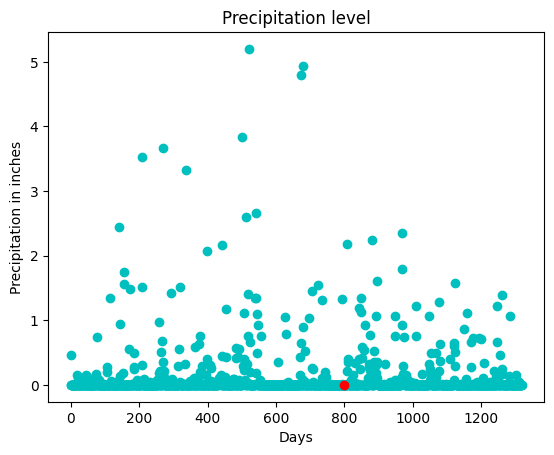

In [12]:
print('The precipitation trend graph: ')
plt.scatter(days, Y, color='c')
plt.scatter(days[day_index], Y[day_index], color='r')
plt.title('Precipitation level')
plt.xlabel('Days')
plt.ylabel('Precipitation in inches')

# Plot a graph of precipitation levels vs number of days
plt.show()

In [14]:
x_f = X.filter(['TempAvgF', 'DewPointAvgF', 'HumidityAvgPercent',
                'SeaLevelPressureAvgInches', 'VisibilityAvgMiles',
                'WindAvgMPH'], axis=1)

Preciptiation Vs Selected Attributes Graph: 


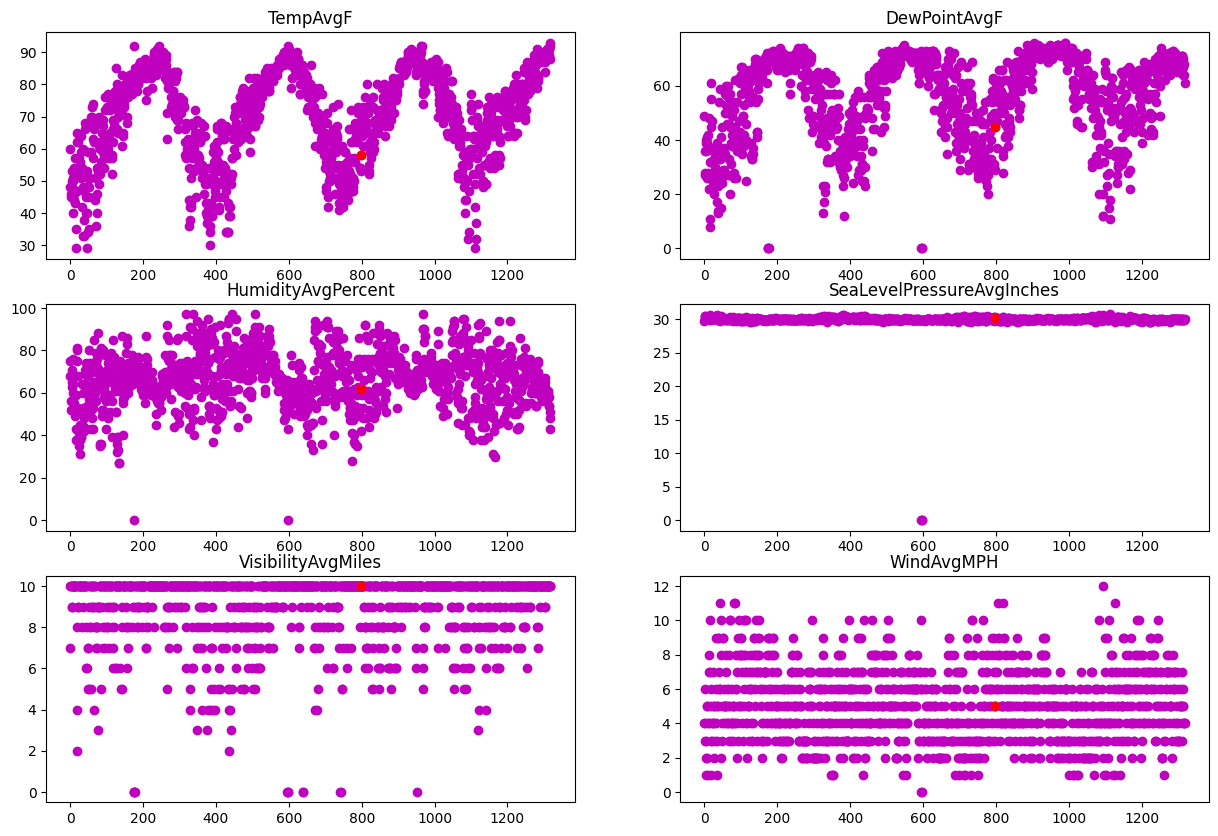

In [17]:
print('Preciptiation Vs Selected Attributes Graph: ')
plt.figure(figsize=(15, 10)) #15 is width and 10 is height
# Iterate over each selected attribute for visualization
for i in range(x_f.columns.size):
    # Create a subplot in a 3x2 grid, with i+1 being current position of that subplot
    plt.subplot(3, 2, i+1)

    # Scatter plot for the selected attribute,with days on the x-axis and the selected attribute on the y-axis
    #We select first 100 elements of the values in the column specified by index i
    plt.scatter(days, x_f[x_f.columns.values[i][:100]], color='m')

    # Highlight a specific day's data point in red. Specific day is determined by the day_index variable.
    plt.scatter(days[day_index], x_f[x_f.columns.values[i]][day_index], color='r')

    # Set the title of the subplot to the attribute name
    plt.title(x_f.columns.values[i])

# Display the subplots for each of the selected atributes
plt.show()
